# Skysim Galaxies to Mass Sheets
Compare the galaxy population in Skysim5000 to the mass density sheets to make sure the galaxies are populating more in the overdense regions

In [1]:
import GCRCatalogs as gcrc
from astropy.table import Table
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

import os
import time
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM

%matplotlib inline

/global/homes/v/vanalfen/mydesc/lib/python3.8/site-packages/GCRCatalogs/register.py:159: UserWarning: Site determined from env variable DESC_GCR_SITE = nersc, which differs from node name login35.chn
  warnings.warn("Site determined from env variable {} = {}, which differs from node name {}".format(


In [2]:
ra = []
dec = []
redshift = []

In [25]:
cat_name = 'skysim5000_v1.1.1'
cat = gcrc.load_catalog(cat_name)

In [37]:
for data in cat.get_quantities(['ra', 'dec', 'redshift'], filters=["redshift > 0.50900900", "redshift < 0.56786270"], return_iterator=True):
    ra.append( data["ra"] )
    dec.append( data["dec"] )
    redshift.append( data['redshift'] )

In [27]:
ra = np.hstack(ra)
dec = np.hstack(dec)
redshift = np.hstack(redshift)

In [28]:
#np.save("Skysim_ra_snapshot_319-328.npy", ra)
#np.save("Skysim_dec_snapshot_319-328.npy", dec)
#np.save("Skysim_redshift_snapshot_319-328.npy", redshift)

In [3]:
#ra = np.load("Skysim_ra_snapshot_319-328.npy")
#dec = np.load("Skysim_dec_snapshot_319-328.npy")
#redshift = np.load("Skysim_redshift_snapshot_319-328.npy")

In [4]:
data_file = '/global/cfs/cdirs/lsst/groups/CS/mass_sheets/density_map_323_dens.bin'
print('Working on file '+data_file)
tmp = np.fromfile(data_file,'<f')

Working on file /global/cfs/cdirs/lsst/groups/CS/mass_sheets/density_map_323_dens.bin


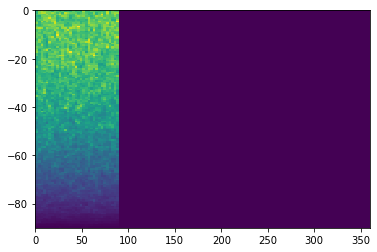

In [5]:
plt.hist2d( ra, dec, bins=128 );

In [6]:
# the ranges for snapshots: [ 328-323, 323-319, all(328-319) ]
low_z = [ 0.50900900, 0.52735562, 0 ]
high_z = [ 0.54853621, 0.56786270, 1 ]
all_healpix_map = []

for i in range(len(low_z)):
    print(i)
    
    mask = ( redshift > low_z[i] ) & ( redshift < high_z[i] )
    
    ############################################################################################################

    # Convert ra and dec from degrees to radians
    ra_rad = np.deg2rad(ra[mask])
    dec_rad = np.deg2rad(dec[mask])

    ###########################################################################################################

    # Choose a HEALPix resolution (nside parameter)
    nside = 1024

    # Convert (ra, dec) to HEALPix pixel indices
    pix_indices = hp.ang2pix(nside, np.pi/2 + dec_rad, ra_rad)

    # Create an empty HEALPix map
    all_healpix_map.append( np.zeros(hp.nside2npix(nside), dtype=int) )

    # Bin the galaxy coordinates into the HEALPix map
    for idx in pix_indices:
        all_healpix_map[i][idx] += 1

    # Visualize the map
    #hp.mollview(healpix_map, title="Binned Galaxy Coordinates", unit="Number of Galaxies", cmap="viridis", min=0)

0
1
2


Mass Sheet


/global/homes/v/vanalfen/mydesc/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/global/homes/v/vanalfen/mydesc/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/global/homes/v/vanalfen/mydesc/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globall

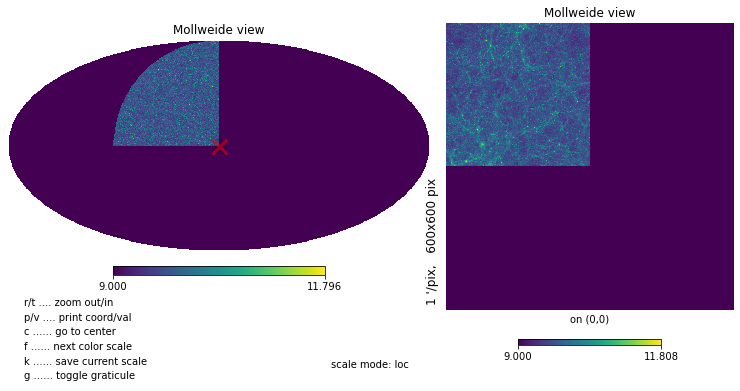

In [7]:
print( "Mass Sheet" )
hp.zoomtool.mollzoom(np.log10(tmp+1e9), nest=True)

Snapshots 328-323 (Lower Range)


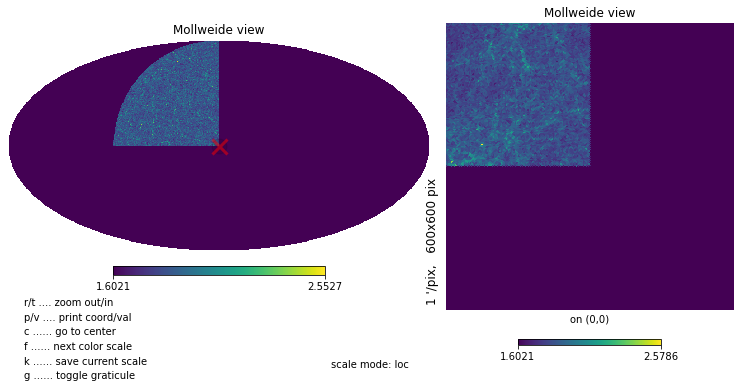

In [8]:
print("Snapshots 328-323 (Lower Range)")
hp.zoomtool.mollzoom(np.log10(all_healpix_map[0]+4e1))

Snapshots 323-319 (Upper Range)


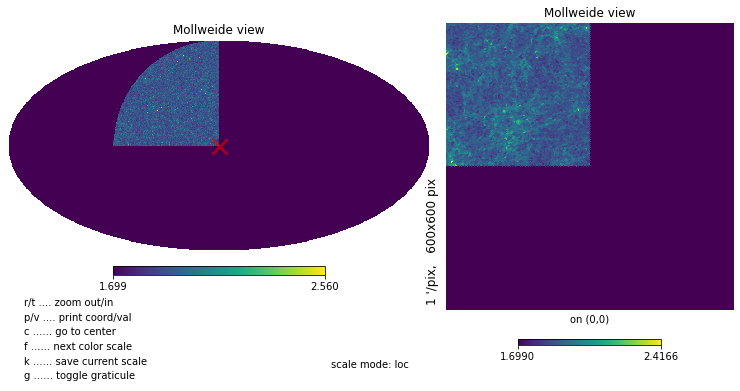

In [9]:
print("Snapshots 323-319 (Upper Range)")
hp.zoomtool.mollzoom(np.log10(all_healpix_map[1]+5e1))

Snapshots 328-319 (All)


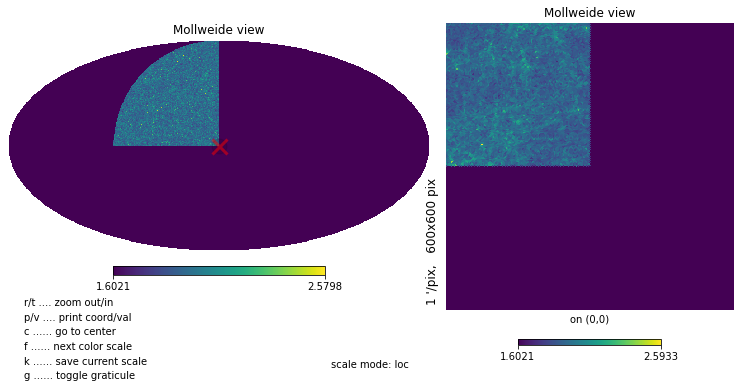

In [10]:
print("Snapshots 328-319 (All)")
hp.zoomtool.mollzoom(np.log10(all_healpix_map[2]+4e1))